<a href="https://colab.research.google.com/github/GabrielFCosta/RNAs/blob/main/MATB05_perceptron_atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/iris.csv')

In [ ]:
y = dataset['Species']
y = np.where(y == 'setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
X = dataset.drop(['Species'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1,random_state=0)
X_train.shape

(135, 4)

In [ ]:
def ativacao(u, t):
  return (1 if u > t else -1)

def perceptron(X_train, y_train, threshold, eta, epochs):
  # parametros
  b = 0
  w = np.zeros(X_train.shape[1])
  random.seed(0)
  for i in np.arange(epochs):
    #print(f"Epoch: {i}")
    j = random.randint(0,X_train.shape[0]-1)
    u = np.sum(w*X_train.iloc[j,]) + b
    y_hat = ativacao(u, threshold)
    if y_train[j] != y_hat:
      w = w + eta*(y_train[j] - y_hat)*X_train.iloc[j,]
      b = b + eta*(y_train[j] - y_hat)
  return [w, b]

def prediction(X_test, modelo, threshold):
  y_hat = []
  for idx, row in X_test.iterrows():
    soma = 0
    c = 0
    for i in modelo[0]:
      soma += row.tolist()[c] * i
      c += 1
    soma += modelo[1]
    y_hat.append(ativacao(soma,threshold))
  return np.asarray(y_hat)

In [ ]:
modelo = perceptron(X_train, y_train, 0.5, 1, 100)
modelo

[Sepal.Length    -3.8
 Sepal.Width    -12.0
 Petal.Length    18.2
 Petal.Width     10.0
 dtype: float64, -2]

In [ ]:
y_test

array([ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
y_hat = prediction(X_test, modelo, 0.5)
y_hat

array([ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
pd.crosstab(y_test, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
True,,,
-1,3,0,3
1,0,12,12
All,3,12,15


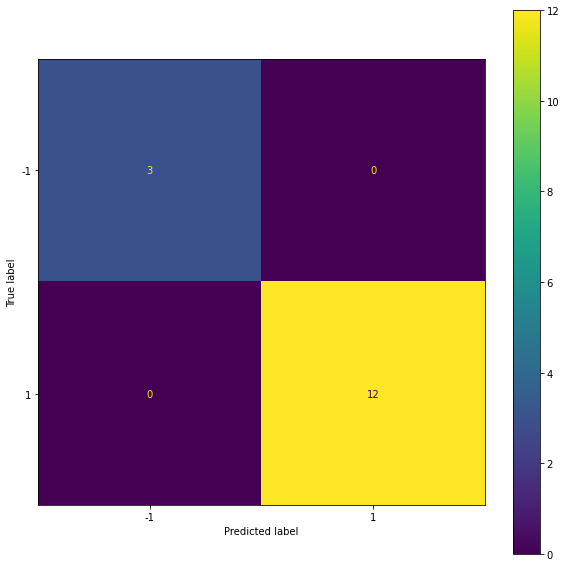

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm, display_labels=["-1","1"]).plot(ax = ax)
plt.show()

In [ ]:
accuracy_score(y_test, y_hat)

1.0

In [ ]:
f1_score(y_test, y_hat, average='macro')

1.0

### Fazer predição utilizando função do perceptron

teste01 : re-executar treino/teste (feito)

teste02 : trocar a classe via binarização

teste03 : alterar tamanho do teste -> 15% a 20%

teste final : pegar um dataset UCI e testar -> fazer validação (matriz de confusão, acurácia, F1)

### Fazer apresentação na próxima aula

In [ ]:
# Teste 02 - Trocar a classe via binarização
y = dataset['Species']
y = np.where(y == 'virginica', -1, 1)
print(y)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1,random_state=0)
modelo = perceptron(X_train, y_train, 0.5, 1, 100)
print(modelo)
print(y_test)
y_hat = prediction(X_test, modelo, 0.5)
print(y_hat)
print("Acurácia: "+str(accuracy_score(y_test, y_hat)))
print("F1 score: "+str(f1_score(y_test, y_hat, average='macro')))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
[Sepal.Length    24.6
Sepal.Width     25.8
Petal.Length   -25.4
Petal.Width    -18.0
dtype: float64, 10]
[-1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Acurácia: 0.7333333333333333
F1 score: 0.423076923076923


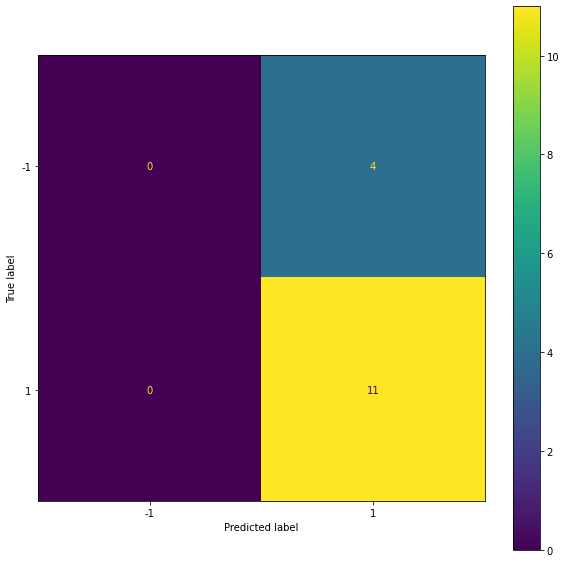

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm, display_labels=["-1","1"]).plot(ax = ax)
plt.show()

In [ ]:
# Teste 03 - Alterar o tamanho do teste para 20%
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)
modelo = perceptron(X_train, y_train, 0.5, 1, 100)
print(modelo)
print(y_test)
y_hat = prediction(X_test, modelo, 0.5)
print(y_hat)
print("Acurácia: "+str(accuracy_score(y_test, y_hat)))
print("F1 score: "+str(f1_score(y_test, y_hat, average='macro')))

[Sepal.Length     7.2
Sepal.Width     13.0
Petal.Length   -21.4
Petal.Width    -15.8
dtype: float64, 4]
[-1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1]
[-1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1  1
 -1  1  1 -1 -1  1]
Acurácia: 0.5666666666666667
F1 score: 0.5542857142857143


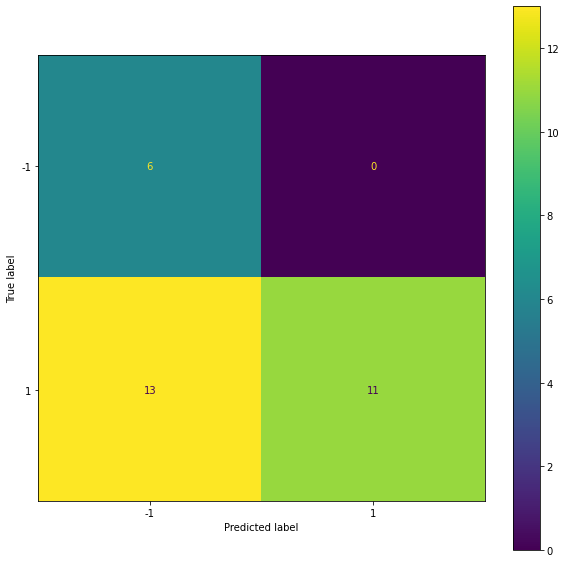

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm, display_labels=["-1","1"]).plot(ax = ax)
plt.show()

In [ ]:
# Teste final : dataset UCI -> testar -> fazer validação (matriz de confusão, acurácia, F1)
# Dados originais: https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy
# Leitura e pré-processamento da base de dados
atributos = ["IR","MR","FF","CR","CO","OP","Class"]
url = "https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/Qualitative_Bankruptcy.data.txt"
dados = pd.read_csv(url, names = atributos)
print(dados)

for atrib in atributos[:6]:
  dados.loc[ dados[atrib] == 'P', atrib] = 2
  dados.loc[ dados[atrib] == 'A', atrib] = 1
  dados.loc[ dados[atrib] == 'N', atrib] = 0

print(dados)

# Conjunto de dados de teste (10%) e treino contendo todos os 6 atributos:
treino = dados.drop(["Class"],axis=1)
classes = dados['Class']
classes = np.where(classes == 'B', -1, 1)
x_train0, x_test0, y_train0, y_test0 = train_test_split(treino,classes,test_size=0.1,random_state=0)

    IR MR FF CR CO OP Class
0    P  P  A  A  A  P    NB
1    N  N  A  A  A  N    NB
2    A  A  A  A  A  A    NB
3    P  P  P  P  P  P    NB
4    N  N  P  P  P  N    NB
..  .. .. .. .. .. ..   ...
245  N  N  A  N  N  N     B
246  P  N  N  N  N  N     B
247  A  N  N  N  N  N     B
248  N  N  N  N  N  N     B
249  P  N  N  N  A  A     B

[250 rows x 7 columns]
    IR MR FF CR CO OP Class
0    2  2  1  1  1  2    NB
1    0  0  1  1  1  0    NB
2    1  1  1  1  1  1    NB
3    2  2  2  2  2  2    NB
4    0  0  2  2  2  0    NB
..  .. .. .. .. .. ..   ...
245  0  0  1  0  0  0     B
246  2  0  0  0  0  0     B
247  1  0  0  0  0  0     B
248  0  0  0  0  0  0     B
249  2  0  0  0  1  1     B

[250 rows x 7 columns]


In [ ]:
modelo = perceptron(x_train0, y_train0, 0.5, 1, 100)
print(modelo)
print(y_test0)
y_hat0 = prediction(x_test0, modelo, 0.5)
print(y_hat0)
print("Acurácia: "+str(accuracy_score(y_test0, y_hat0)))
print("F1 score: "+str(f1_score(y_test0, y_hat0, average='macro')))

[IR   -2.0
MR    2.0
FF    8.0
CR    2.0
CO    6.0
OP    0.0
dtype: object, -8]
[-1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1
 -1]
[-1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1
 -1]
Acurácia: 1.0
F1 score: 1.0


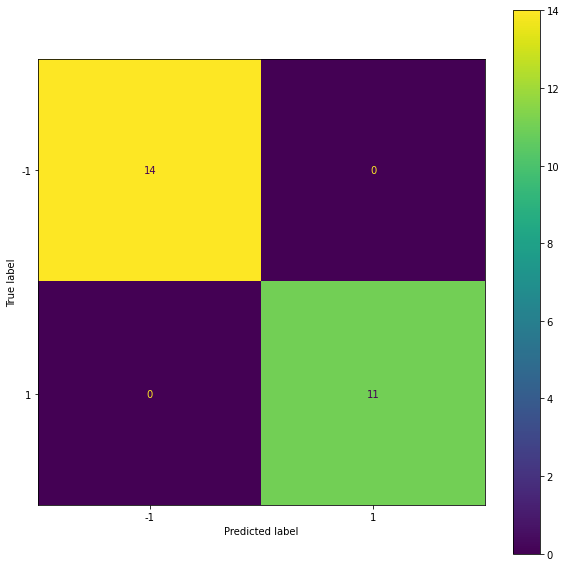

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test0, y_hat0)
ConfusionMatrixDisplay(cm, display_labels=["-1","1"]).plot(ax = ax)
plt.show()

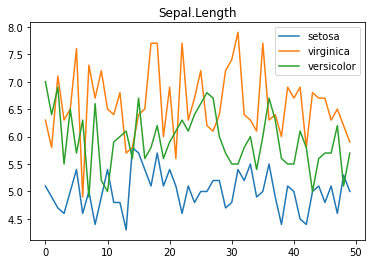

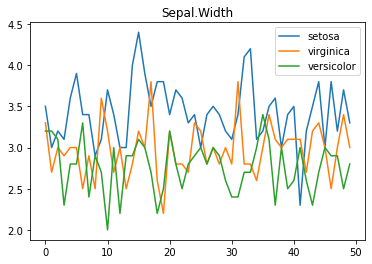

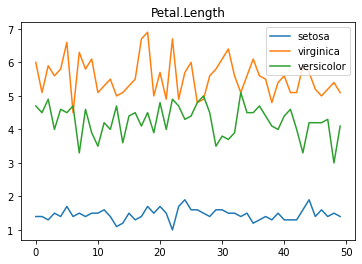

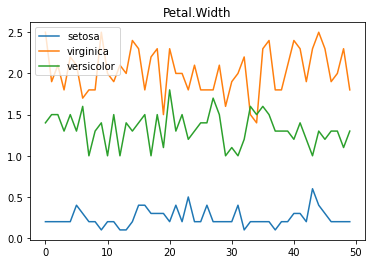

In [ ]:
# gráficos
#print(dataset.Species.unique())
setosa = dataset[dataset['Species'] == 'setosa']
virginica = dataset[dataset['Species'] == 'virginica']
versicolor = dataset[dataset['Species'] == 'versicolor']

plt.plot(setosa['Sepal.Length'].tolist(), label='setosa')
plt.plot(virginica['Sepal.Length'].tolist(), label='virginica')
plt.plot(versicolor['Sepal.Length'].tolist(), label='versicolor')
plt.title('Sepal.Length')
plt.legend()
plt.show()

plt.plot(setosa['Sepal.Width'].tolist(), label='setosa')
plt.plot(virginica['Sepal.Width'].tolist(), label='virginica')
plt.plot(versicolor['Sepal.Width'].tolist(), label='versicolor')
plt.title('Sepal.Width')
plt.legend()
plt.show()

plt.plot(setosa['Petal.Length'].tolist(), label='setosa')
plt.plot(virginica['Petal.Length'].tolist(), label='virginica')
plt.plot(versicolor['Petal.Length'].tolist(), label='versicolor')
plt.title('Petal.Length')
plt.legend()
plt.show()

plt.plot(setosa['Petal.Width'].tolist(), label='setosa')
plt.plot(virginica['Petal.Width'].tolist(), label='virginica')
plt.plot(versicolor['Petal.Width'].tolist(), label='versicolor')
plt.title('Petal.Width')
plt.legend()
plt.show()